# Linear Regression Project

This project deals with a fictional Ecommerce clothing company that has online stores and they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

## Question

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. The project is geared towards helping them figure it out.

## Imports

Preliminary imports are here and other modules are imported as needed.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Reading in the data

Here the company has provided customer informtion in a csv file. It consists of details such as Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 

Here, the csv file is read in as a DataFrame called customers using pandas' `read_csv` method.

In [2]:
customers = pd.read_csv("Ecommerce Customers")

**Get overview of the data using pandas `info()` & `describe()` methods.**

In [3]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


## Exploratory Data Analysis

Exploring the data by asking some basic questions and trying to gain a deeper insight through data visualization.

**Is there a correlation between Time on Website to Yearly Amount Spent and Time on App to Yearly Amount Spent?
What does this inform us?**

In [57]:
# Setting visualization style in seaborn

sns.set_palette("viridis")
sns.set_style('whitegrid')

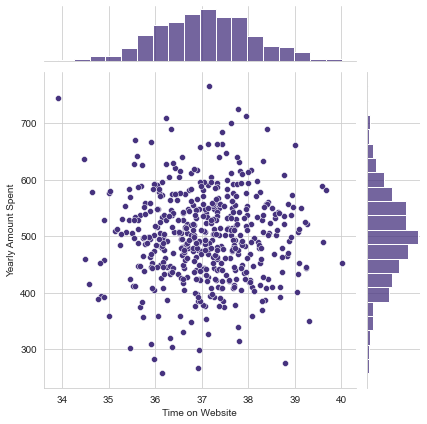

In [60]:
# Website
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=customers)

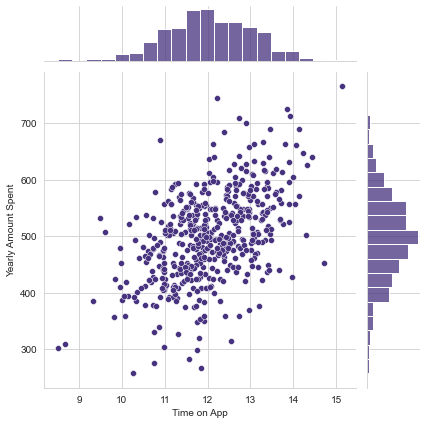

In [61]:
# App
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=customers)

What is the relation between Time spent on App and Length of Membership?

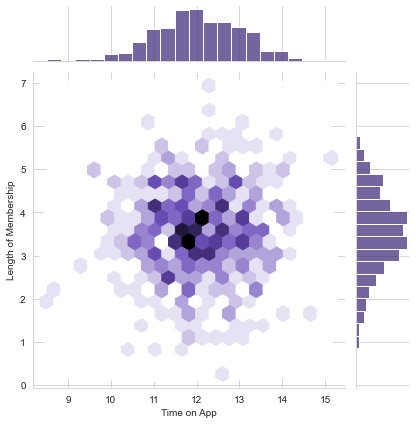

In [62]:
# Using a jointplot with hex bins here instead of scatter.
sns.jointplot(x='Time on App',y='Length of Membership',kind='hex',data=customers)

**To get a higher level overview and the types of relationships explored above across the entire data set, visualize a pairplot of the whole dataframe.**

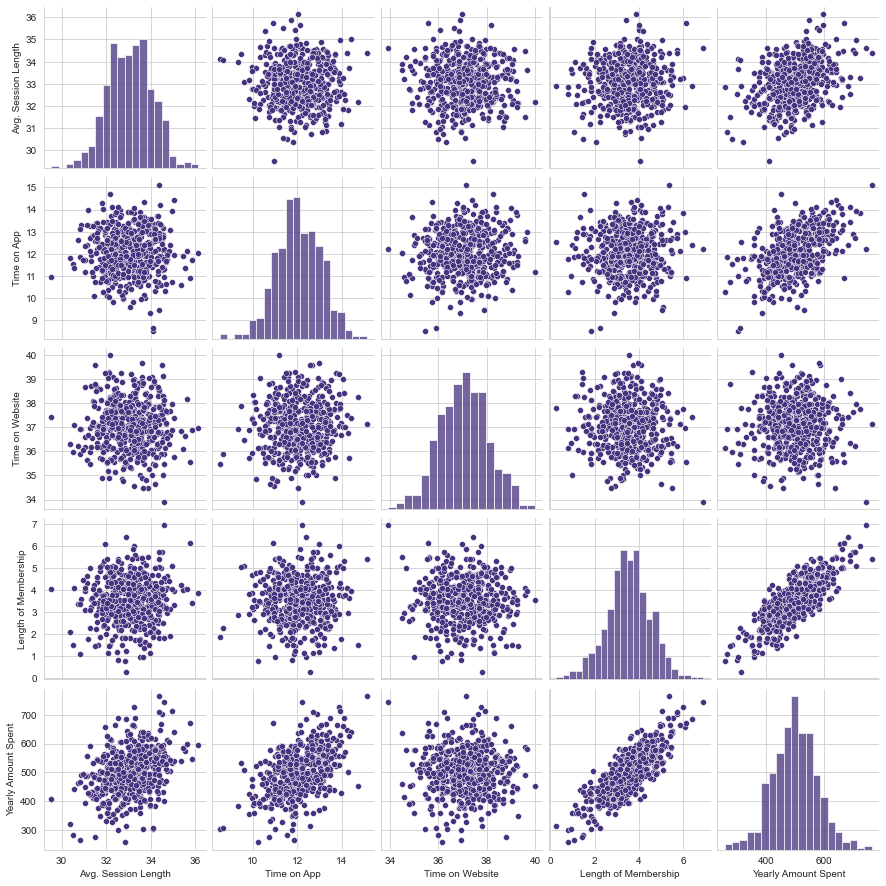

In [63]:
sns.pairplot(customers)

**Based off of pairplot it looks like the most correlated feature with Yearly Amount Spent is Length of Membership.**

Creating a linear model plot of Yearly Amount Spent vs. Length of Membership.

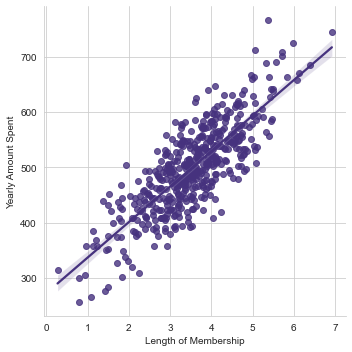

In [64]:
# Using seaborn's lmplot
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=customers)

## Splitting the data into Training and Testing sets.

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.

**Set a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column.**

In [65]:
y = customers['Yearly Amount Spent']

In [66]:
X = customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

**Import model_selection.train_test_split from sklearn to split the data into training and testing sets.**

* test_size=0.3 (30% of the data is used as testing data ==> 70% of the data is used for training)
* random_state=73 (Pick a random state, I go with 73, because its the best number. :P)

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Training the Model

Time to train the model on the training data.

**Import LinearRegression from sklearn.linear_model**

In [71]:
from sklearn.linear_model import LinearRegression

**Create an instance of a LinearRegression() model named lm.**

In [72]:
lm = LinearRegression()

**Train (fit) lm on the training data.**

In [73]:
lm.fit(X_train,y_train)

LinearRegression()

**Print out the coefficients of the model**

In [74]:
# The coefficients
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [25.98154972 38.59015875  0.19040528 61.27909654]


## Predicting Test Data
Now that the model is trained, time to evaluate its performance by predicting off the test values!

**Use lm.predict() to predict off the X_test set of the data.**

In [75]:
predictions = lm.predict(X_test)

**Create a scatterplot of the real test values versus the predicted values.**

Text(0, 0.5, 'Predicted Y')

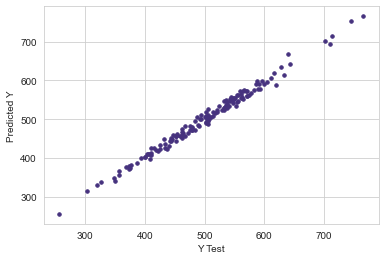

In [83]:
plt.scatter(y_test,predictions,s=12)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

## Evaluating the Model

Evaluate the model performance by calculating the residual sum of squares and the variance score.

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [84]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 7.228148653430832
MSE: 79.81305165097456
RMSE: 8.93381506697864


## Residuals

Explore the residuals to make sure everything was okay with our data. 

**Plot a histogram of the residuals and make sure it is normally distributed.**

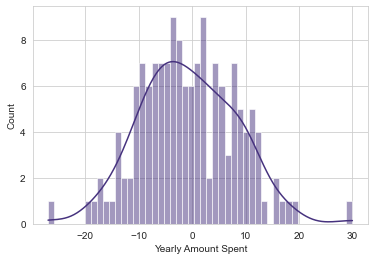

In [87]:
# Using seaborn's distplot
sns.histplot((y_test-predictions),bins=50,kde=True);

## Conclusion
To the original question, Should they focus their efforts on mobile app or website development? Or maybe that isn't the right question, and Membership Time is what is really important. 

Trying to get additional insight into the results by interpreting the coefficients.

**Creating a new dataframe of regression coefficients and number columns (X data)**

In [88]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


**What does these coefficients infer? **

Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in 
    - **Avg. Session Length** is associated with an **increase of 25.98 total dollars spent**.
    - **Time on App** is associated with an **increase of 38.59 total dollars spent**.
    - **Time on Website** is associated with an **increase of 0.19 total dollars spent**.
    - **Length of Membership** is associated with an **increase of 61.27 total dollars spent**.

**Where should the company focus more,their mobile app or on their website?**


This is a judgement call, there are two ways to think about this: 
- Develop the Website to catch up to the performance of the mobile app.
- Or develop the app more since that is what is working better. 

This sort of answer really depends on the other factors going on at the company, further exploration into the relationship between Length of Membership and the App or the Website is needed to come to a clear conclusion
